# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [21]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [44]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#print(requests.get(url + "q=london" + "&appid=" + weather_api_key).json())
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iskateley
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | prince rupert
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | shahr-e babak
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | craig
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | caleta de carquin
Processing Record 17 of Set 1 | ust'-talovka
Processing Record 18 of Set 1 | keflavik
Processing Record 19 of Set 1 | tinogasta
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | pisco
Processing Record 22 of Set 1 | 

Processing Record 40 of Set 4 | laminusa
Processing Record 41 of Set 4 | chonchi
Processing Record 42 of Set 4 | eforie sud
Processing Record 43 of Set 4 | negru voda
Processing Record 44 of Set 4 | las khorey
Processing Record 45 of Set 4 | labytnangi
Processing Record 46 of Set 4 | taman rajawali
City not found. Skipping...
Processing Record 47 of Set 4 | mount isa
Processing Record 48 of Set 4 | ilulissat
Processing Record 49 of Set 4 | georgetown
Processing Record 0 of Set 5 | sitia
Processing Record 1 of Set 5 | saint simons island
City not found. Skipping...
Processing Record 2 of Set 5 | la sarre
Processing Record 3 of Set 5 | muzayri'
City not found. Skipping...
Processing Record 4 of Set 5 | lakatoro
Processing Record 5 of Set 5 | deqing
Processing Record 6 of Set 5 | al burayqah
Processing Record 7 of Set 5 | muisne
Processing Record 8 of Set 5 | cushing
Processing Record 9 of Set 5 | mount gambier
Processing Record 10 of Set 5 | homer
Processing Record 11 of Set 5 | upata
Pr

Processing Record 29 of Set 8 | coahuayana de hidalgo
Processing Record 30 of Set 8 | twante
Processing Record 31 of Set 8 | new norfolk
Processing Record 32 of Set 8 | poli
Processing Record 33 of Set 8 | toliara
Processing Record 34 of Set 8 | namibe
Processing Record 35 of Set 8 | sao vicente
Processing Record 36 of Set 8 | kapa'a
Processing Record 37 of Set 8 | necochea
Processing Record 38 of Set 8 | chifeng
Processing Record 39 of Set 8 | tokonou
Processing Record 40 of Set 8 | batang
Processing Record 41 of Set 8 | fortuna
Processing Record 42 of Set 8 | asino
Processing Record 43 of Set 8 | tamanrasset
Processing Record 44 of Set 8 | chernyshevskiy
Processing Record 45 of Set 8 | kigoma
Processing Record 46 of Set 8 | saint-doulchard
Processing Record 47 of Set 8 | naze
Processing Record 48 of Set 8 | mermoz boabab
Processing Record 49 of Set 8 | suva
Processing Record 0 of Set 9 | teknaf
Processing Record 1 of Set 9 | zhangatas
Processing Record 2 of Set 9 | sitangkai
Processi

Processing Record 18 of Set 12 | howard springs
Processing Record 19 of Set 12 | hihifo
City not found. Skipping...
Processing Record 20 of Set 12 | aquin
Processing Record 21 of Set 12 | salinopolis
Processing Record 22 of Set 12 | kulhudhuffushi
Processing Record 23 of Set 12 | el daein
City not found. Skipping...
Processing Record 24 of Set 12 | kalmunai
Processing Record 25 of Set 12 | villa del totoral
Processing Record 26 of Set 12 | kurumkan
Processing Record 27 of Set 12 | al bawiti
Processing Record 28 of Set 12 | andergrove
Processing Record 29 of Set 12 | santa cruz
Processing Record 30 of Set 12 | axim
Processing Record 31 of Set 12 | kalevala
Processing Record 32 of Set 12 | naha
Processing Record 33 of Set 12 | yangor
City not found. Skipping...
Processing Record 34 of Set 12 | dhidhdhoo
Processing Record 35 of Set 12 | maridi
Processing Record 36 of Set 12 | jinchang
Processing Record 37 of Set 12 | bandarbeyla
Processing Record 38 of Set 12 | brisas de zicatela
Processi

In [45]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [46]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iskateley,67.6803,53.1512,-18.88,97,100,1.79,RU,1707167032
1,albany,42.6001,-73.9662,3.94,41,1,1.34,US,1707166787
2,iqaluit,63.7506,-68.5145,-19.06,77,100,1.03,CA,1707167032
3,edinburgh of the seven seas,-37.0676,-12.3116,15.77,63,2,1.95,SH,1707167032
4,grytviken,-54.2811,-36.5092,7.48,69,87,5.67,GS,1707167033


In [47]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [48]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,-18.88,97,100,1.79,RU,1707167032
1,albany,42.6001,-73.9662,3.94,41,1,1.34,US,1707166787
2,iqaluit,63.7506,-68.5145,-19.06,77,100,1.03,CA,1707167032
3,edinburgh of the seven seas,-37.0676,-12.3116,15.77,63,2,1.95,SH,1707167032
4,grytviken,-54.2811,-36.5092,7.48,69,87,5.67,GS,1707167033


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

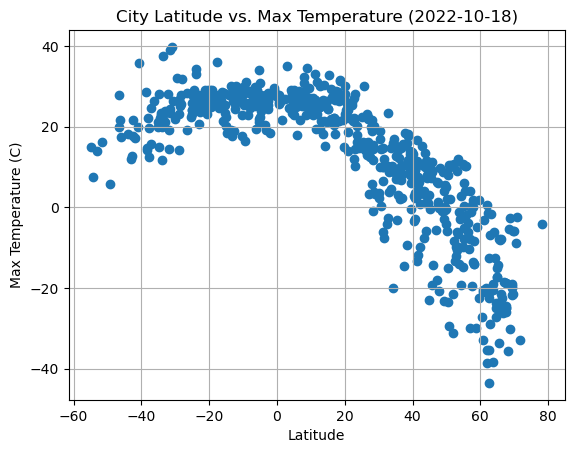

In [49]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

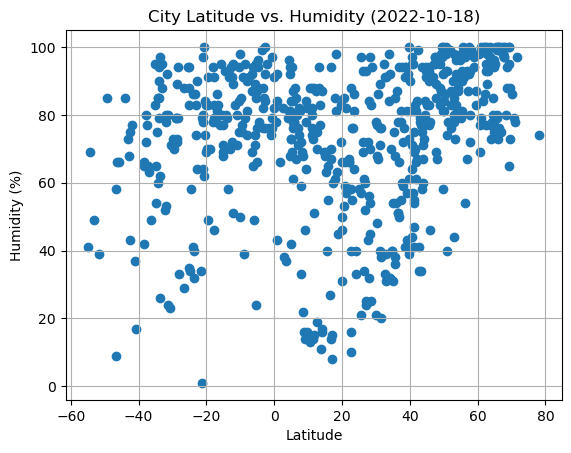

In [50]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

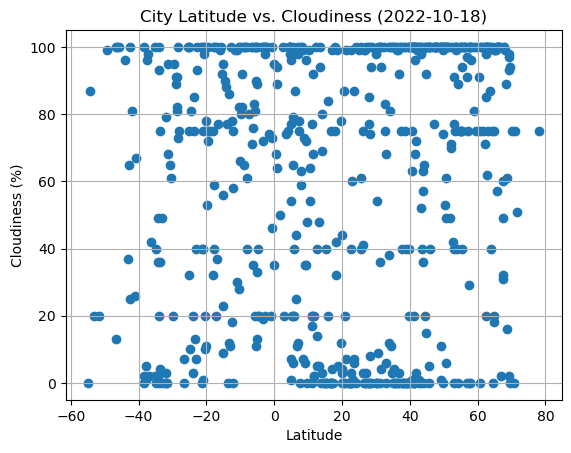

In [53]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

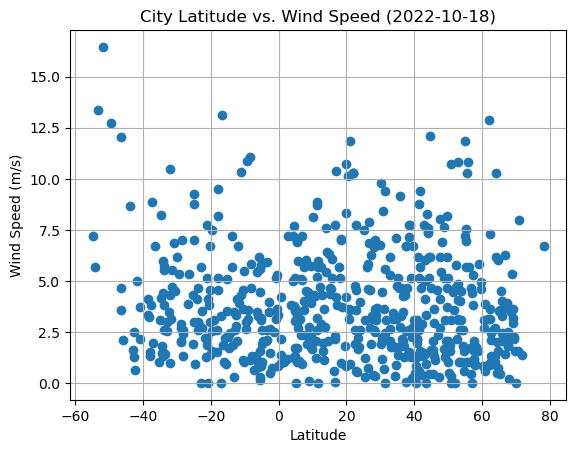

In [54]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [98]:
# Define a function to create Linear Regression plots
# function plots line and returns the line equation as a string so it can be added to the plot
def regress_plt(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    line_equation = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plt.annotate(line_equation, (2,2),fontsize="20",color="red")
    print("The r value is:",rvalue)
    regress_values = x_values * slope + intercept
    plt.plot(x_values,regress_values, "r")
    
   
    return line_equation

In [99]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,-18.88,97,100,1.79,RU,1707167032
1,albany,42.6001,-73.9662,3.94,41,1,1.34,US,1707166787
2,iqaluit,63.7506,-68.5145,-19.06,77,100,1.03,CA,1707167032
6,prince rupert,54.3161,-130.3201,2.83,87,0,2.57,CA,1707167033
9,hawaiian paradise park,19.5933,-154.9731,21.69,83,78,0.89,US,1707167033


In [100]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,15.77,63,2,1.95,SH,1707167032
4,grytviken,-54.2811,-36.5092,7.48,69,87,5.67,GS,1707167033
5,hermanus,-34.4187,19.2345,20.45,85,2,1.80,ZA,1707167033
7,ushuaia,-54.8000,-68.3000,14.81,41,0,7.20,AR,1707167033
8,adamstown,-25.0660,-130.1015,24.12,83,100,6.98,PN,1707167033


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8644813503703964


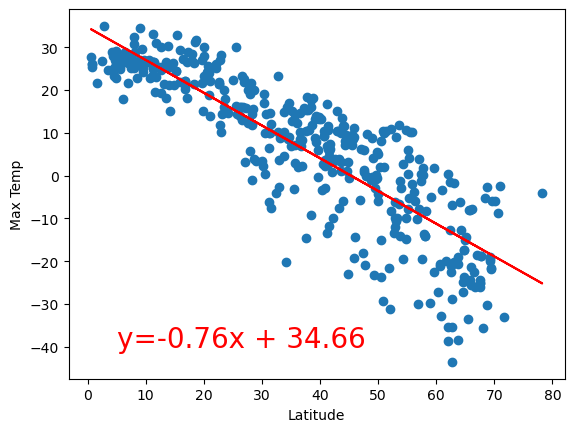

In [112]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])


line_eq = regress_plt(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.annotate(line_eq,(5,-40),fontsize="20",color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r value is: 0.4342250394721441


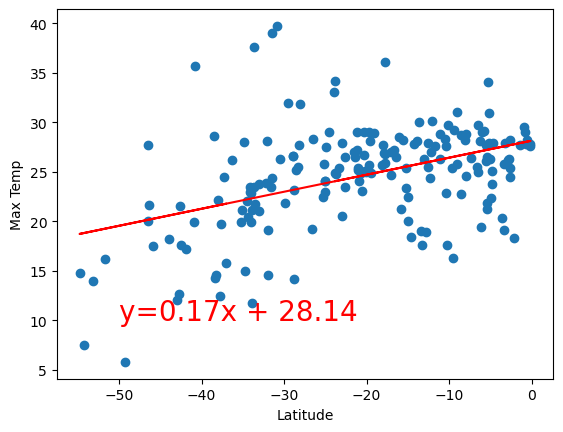

In [113]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])


line_eq = regress_plt(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.annotate(line_eq,(-50,10),fontsize="20",color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** The first plot shows a strong negative correlation between latitude and max temperature for the northern hemisphere, showing how the temperatures get progressively cooler the further north that a city is located. The second plot shows a moderate postive correlation between lattitude and max temperature, showing city temperatures getting warmer closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.4178229110897111


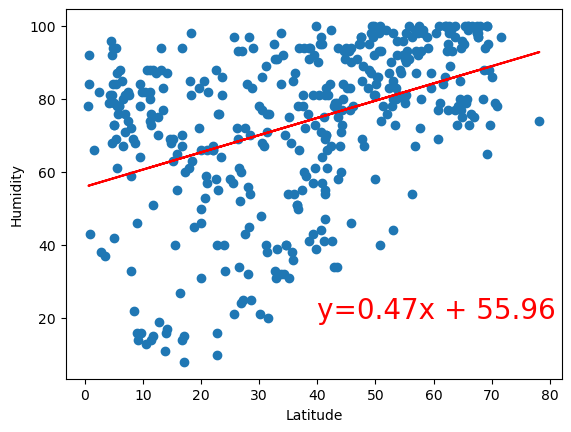

In [120]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])


line_eq_three = regress_plt(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.annotate(line_eq_three,(40,20),fontsize="20",color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r value is: 0.3579688607946049


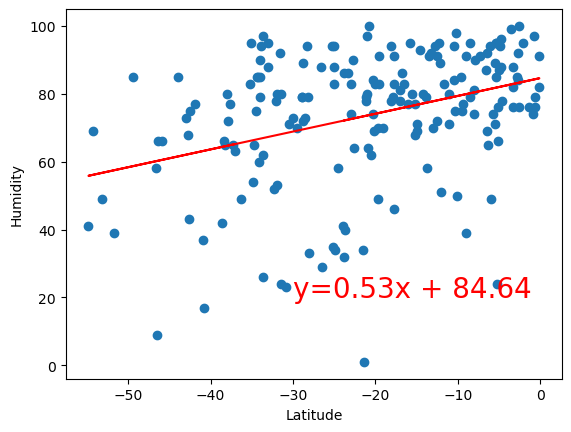

In [123]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])


line_eq_three = regress_plt(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.annotate(line_eq_three,(-30,20),fontsize="20",color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** The first graph shows a small amount of correlation between the latitude and the humidity for the northern hemishphere, and the second shows an even weaker correlation for the southern hemishphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.24284319015784028


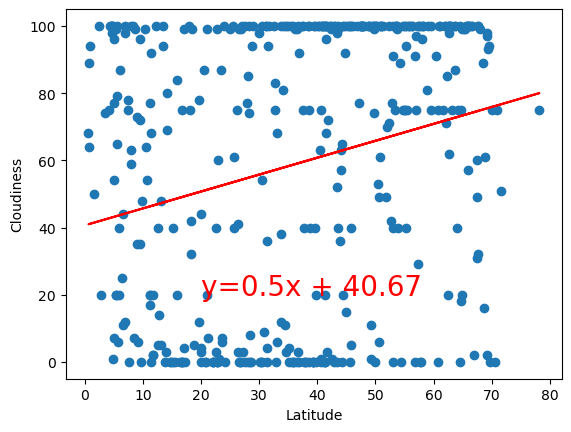

In [134]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])


line_eq_three = regress_plt(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

plt.annotate(line_eq_three,(20,20),fontsize="20",color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r value is: 0.2105354172098505


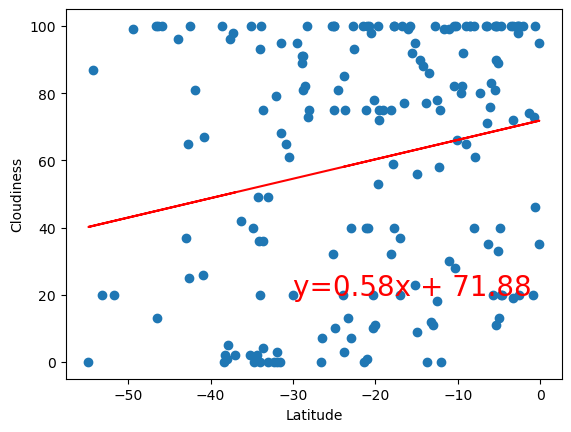

In [136]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])


line_eq_three = regress_plt(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

plt.annotate(line_eq_three,(0,20),fontsize="20",color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** These two graphs for the northern and southern hemispheres don't show any significant correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: -0.09409556293466516


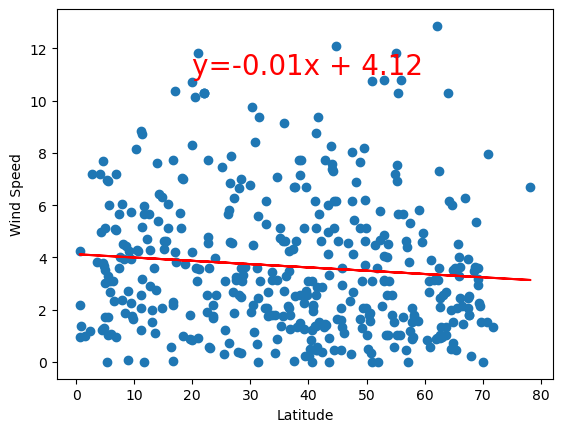

In [142]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])


line_eq_three = regress_plt(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

plt.annotate(line_eq_three,(20,11),fontsize="20",color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r value is: -0.26040319417846375


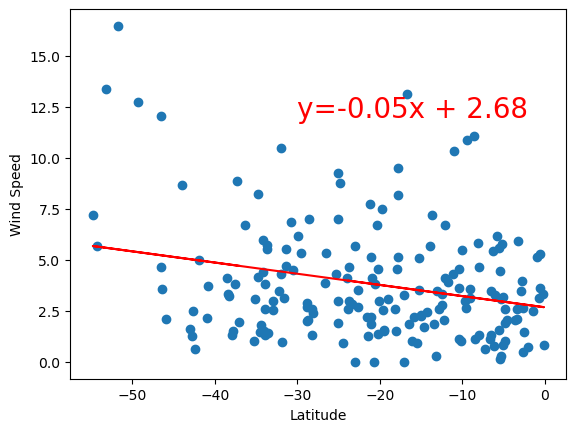

In [147]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])


line_eq_three = regress_plt(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

plt.annotate(line_eq_three,(-30,12),fontsize="20",color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** These graphs don't show any significant correlation between latitude and wind speed.